#### Figure 3_A

We require `pandas` to read and process the information in an Excel file. For generating plots, we will use `seaborn`, `matplotlib`, and from the papers citation `raincloud plots` which has a python package `ptitprince`. 

We will use the color palette `n_colors=1` to ensure that the figures are the same color as the paper.

> [1] Gavriilidou, A., Kautsar, S.A., Zaburannyi, N. et al. Compendium of specialized metabolite biosynthetic diversity encoded in bacterial genomes. Nat Microbiol 7, 726–735 (2022). (https://doi.org/10.1038/s41564-022-01110-2)

> [2] Allen M, Poggiali D, Whitaker K et al. Raincloud plots: a multi-platform tool for robust data visualization [version 2; peer review: 2 approved]. Wellcome Open Res 2021, 4:63 (https://doi.org/10.12688/wellcomeopenres.15191.2)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt


ImportError: cannot import name '_CategoricalScatterPlotter' from 'seaborn.categorical' (/Users/sinaberkgolech/.pyenv/versions/3.9.16/lib/python3.9/site-packages/seaborn/categorical.py)

We selected `sheet_name="Fig3 panel a"` and we have all the data.

In [ ]:
df = pd.read_excel("Table_3.xlsx", sheet_name="Fig3 panel a")

For each label (for Figure 3 A y ticks) the order and the names are like the following;

* Phyla
* Classes
* Orders
* Families
* Genera
* Species

This is why we changed the column names to the respective names and ordered them accordingly.

In [ ]:
df = df.replace({"species":"Species", "genus":"Genera", "family":"Families", "order":"Orders", "class":"Classes", "phylum":"Phyla"})

This particular data point is quite complex because it determines the order in which the dots are plotted in the figure. We attempted to produce every combination by sorting by each column name, but none of the options matched the figures in the paper. Ultimately, we chose the sorting method that yielded the most similar estimate regarding `Variance`.

In [ ]:
df = df.sort_values("Variance").reset_index(drop=True)

As discussed in the paper titled;

> [1] Allen M, Poggiali D, Whitaker K et al. Raincloud plots: a multi-platform tool for robust data visualization [version 2; peer review: 2 approved]. Wellcome Open Res 2021, 4:63 (https://doi.org/10.12688/wellcomeopenres.15191.2)

They utilized the `seaborn` library to generate `stripplot`, `half_violinplot`, and `boxplot` graphs, with the `pointplot` option.

In [ ]:
f, ax = plt.subplots(figsize=(15, 12), dpi=200)

dy="Rank"
dx="Variance"
ort="h"

kwpoint = dict(capsize = 0., errwidth = 0., zorder = 20)

order_fig = ["Species", "Genera", "Families", "Orders", "Classes", "Phyla"]


ax=sns.stripplot(x = dx, 
                 y = dy, 
                 data = df, 
                 palette = pal, 
                 edgecolor = "white",
                 size = 3, 
                 jitter = 1, 
                 zorder = 0, 
                 orient = ort,
                 dodge = False, 
                 order=order_fig[::-1])

ax=sns.boxplot( x = dx, 
               y = dy, 
               data = df, 
               color = "black", 
               width = .15, 
               zorder = 10,\
               showcaps = True, 
               boxprops = {'facecolor':'none', "zorder":10},\
               showfliers=True, 
               whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, 
               orient = ort, 
               dodge = False, 
               order=order_fig[::-1])

ax = sns.pointplot(x=dx, y=dy, data=df, color='red', ax=ax, dodge = False, orient = ort, **kwpoint, order=order_fig[::-1])

ax.set_xscale("symlog")
# 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'

ax.set_xlim([-0.9, 1e+8])

ax.set_ylabel(None)
ax.set_xlabel("Variance of biosynthetic diversity")

# plt.title("Figure_3_A_Reproduced_Topic_10");

After using the seaborn library, we can utilize the `ptitprince` library and incorporate its `.RainCloud()` functionality to create a one-line code. If we don't want to draw a `cloud` plot, we can avoid it.

```python

# Draw cloud/half-violin
half_violinplot(x = x, y = y, hue = hue, data = data,
                order = order, hue_order = hue_order,
                orient = orient, width = width_viol,
                inner = None, palette = palette, bw = bw,  linewidth = linewidth,
                cut = cut, scale = scale, split = split, offset = offset, ax = ax, **kwcloud)

```

The `half_violinplot` function from the module was commented out to avoid drawing the half-violin plot. Therefore, lines 743-748 of the module were altered.


```python

# Draw cloud/half-violin
# half_violinplot(x = x, y = y, hue = hue, data = data,
#                 order = order, hue_order = hue_order,
#                 orient = orient, width = width_viol,
#                 inner = None, palette = palette, bw = bw,  linewidth = linewidth,
#                 cut = cut, scale = scale, split = split, offset = offset, ax = ax, **kwcloud)

```

For our purpose, we need a log transformation which the paper states they made the X axis in logarithmic scale. First the `log` option utilized then the correct option `symlog` utilized and the expected and desired result is produced.

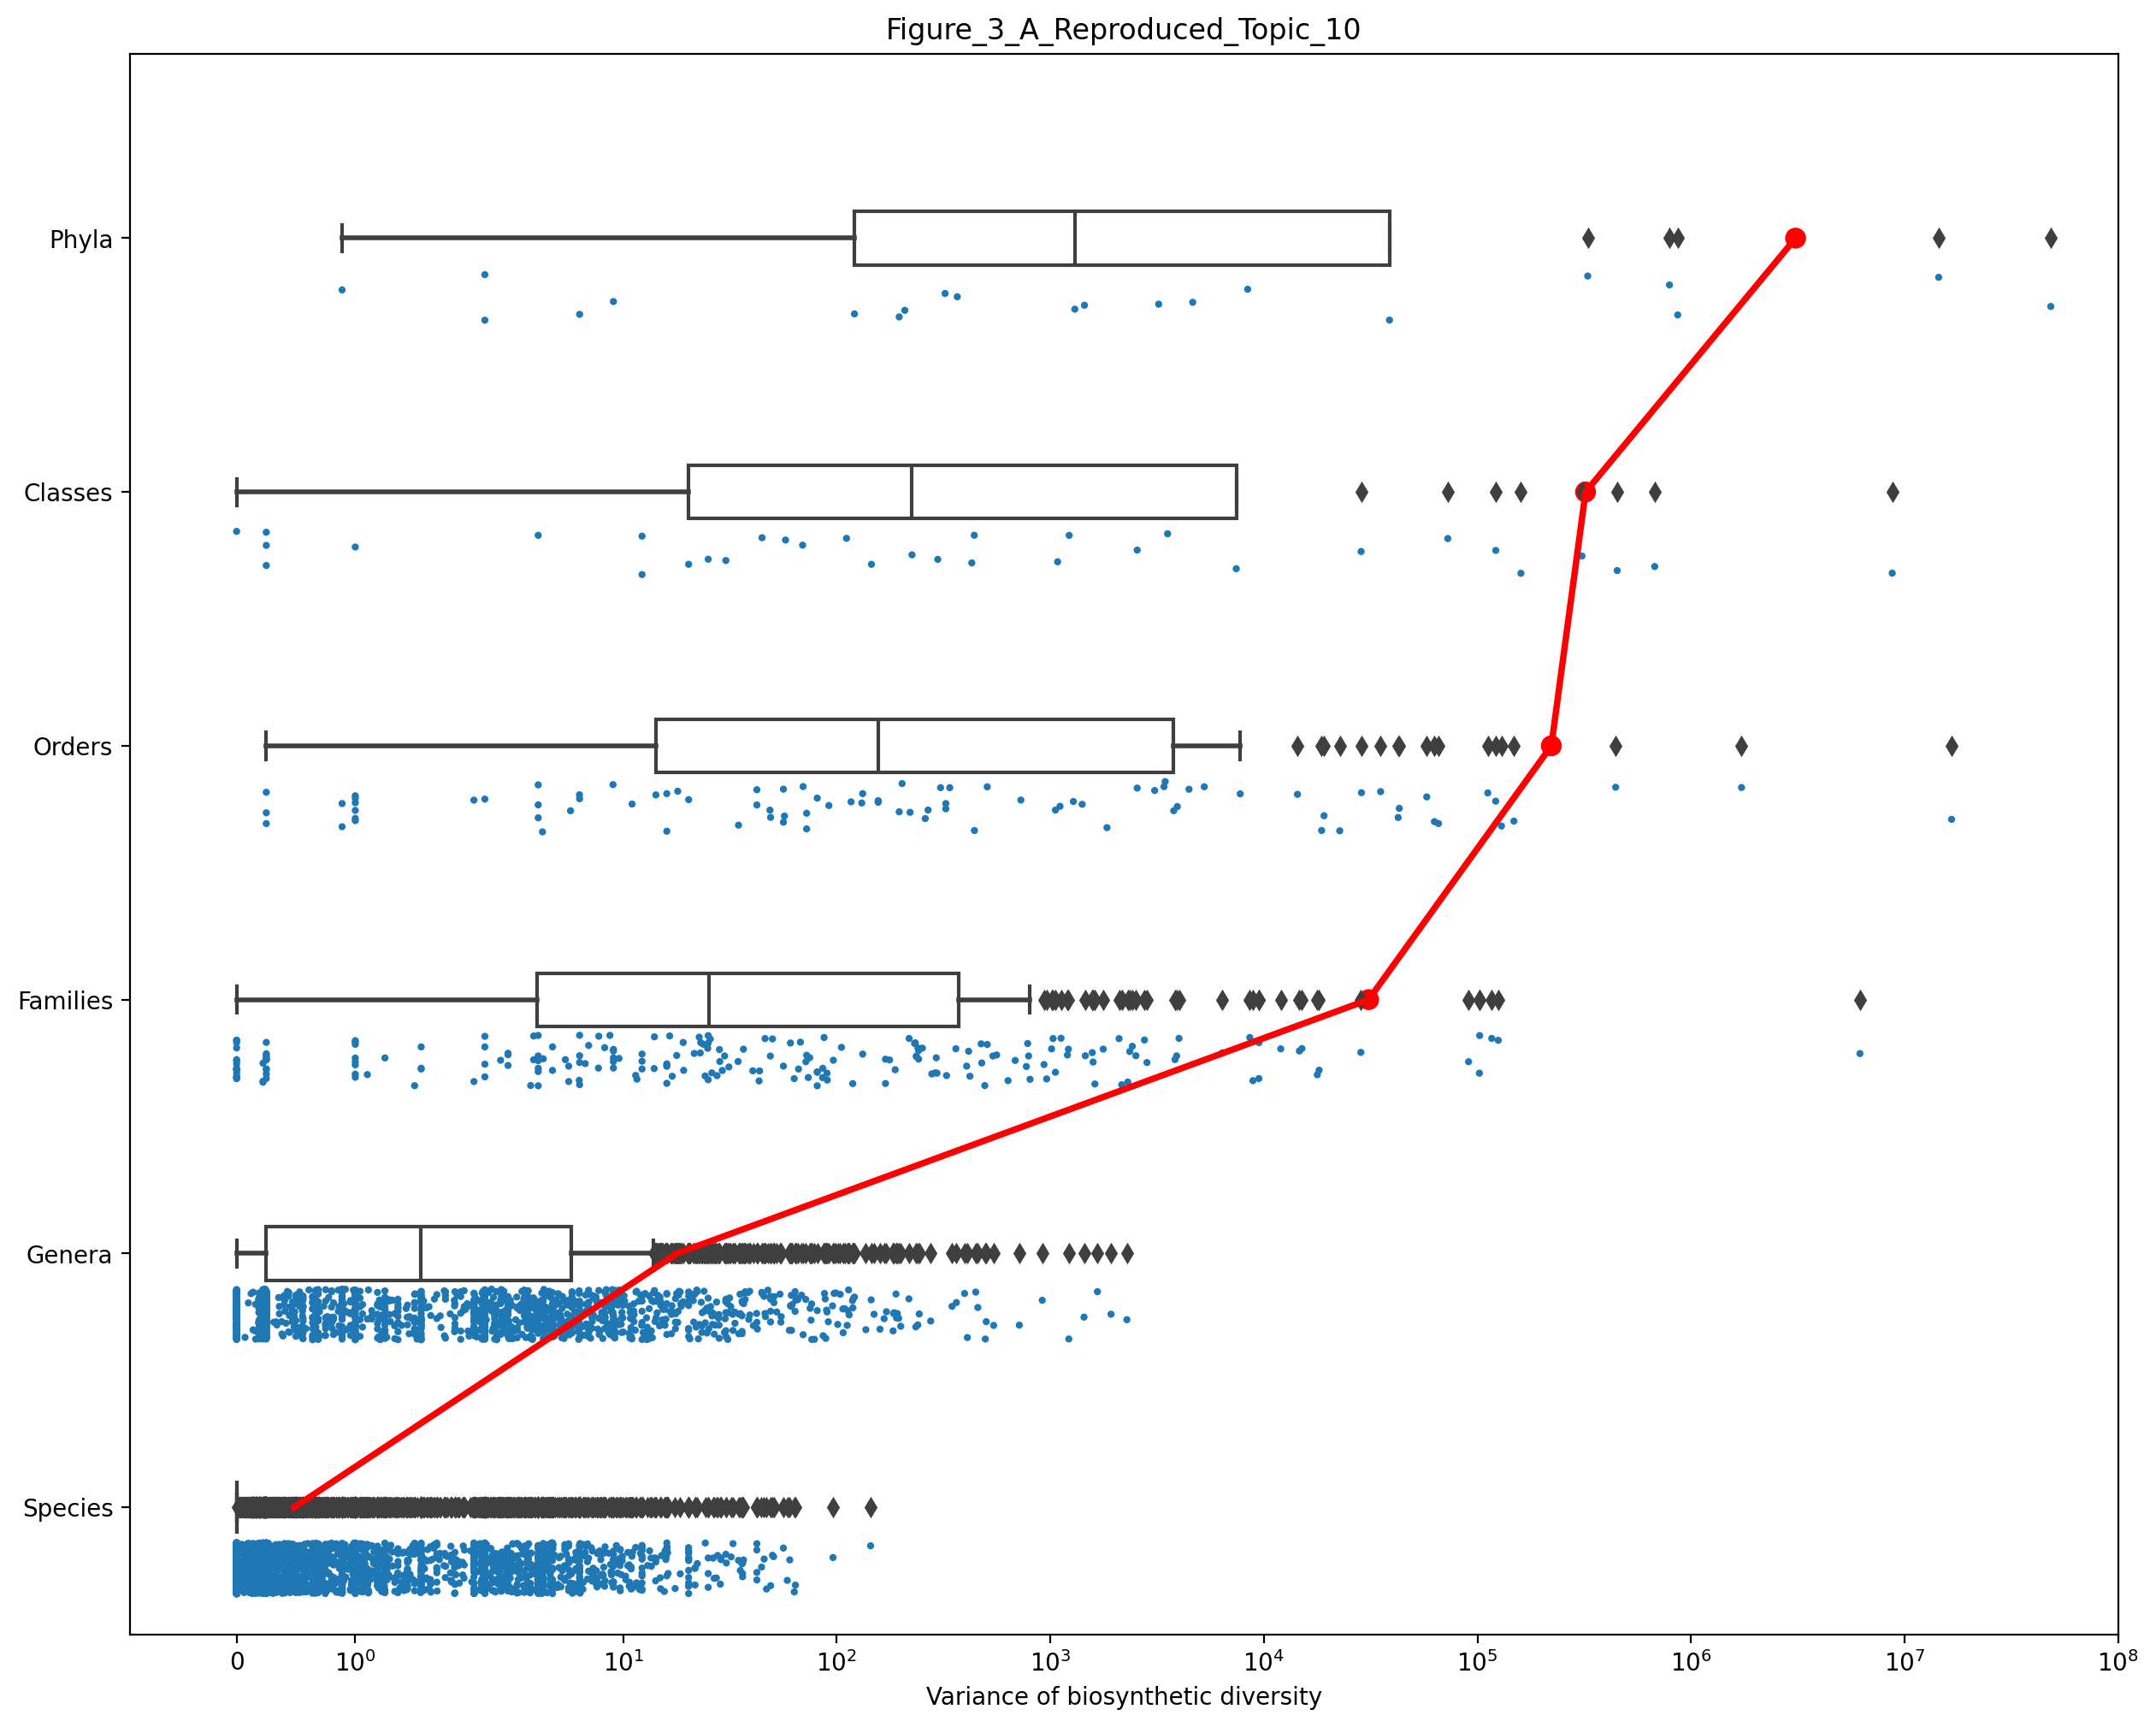

In [6]:
f, ax = plt.subplots(figsize=(15, 12),dpi=200)

ax=pt.RainCloud(x = dy, 
                y = dx, 
                data = df, 
                palette = pal, 
                width_box = .21, 
                ax = ax, 
                orient = ort, 
                pointplot = True, 
                move=0.24, 
                order=order_fig[::-1])

ax.set_xscale("symlog")

ax.set_xlim([-0.9, 1e+8])

ax.set_ylabel(None)
ax.set_xlabel("Variance of biosynthetic diversity");

# plt.title("Figure_3_A_Reproduced_Topic_10");

# Save the figure option.
# plt.savefig("Figures_3_Original_Format/output_figure_3_A_Topic_10.png", dpi=300)

#### END OF REPRODUCING FIGURE 3 A.

Here are the efforts and attempted steps that are necessary but not included in reproducing Figure 3A. It is always better to comment rather than delete code.

In [7]:
# f, ax = plt.subplots(figsize=(12, 11))

# dx="Rank"; dy="Variance"; ort="h"

# ax=sns.stripplot(data=df, 
#                  palette="Set2", 
#                  edgecolor="white",
#                  size=2,
#                  orient=ort,\
#                  x=dx,
#                  y=dy,
#                  jitter=1,
#                  zorder=0)

# ax=sns.boxplot(data=df, 
#                color="black",
#                orient=ort,
#                width=.15,
#                x=dx,
#                y=dy,
#                zorder=10,\
#               showcaps=True,
#                boxprops={'facecolor':'none', "zorder":10},\
#                showfliers=True,
#                whiskerprops={'linewidth':2, "zorder":10},
#                saturation=1)

# #ax = sns.pointplot(x=dx, y=dy, data=ddf,color='red')
# # Finalize the figure
# #ax.set(ylim=(3.5, -.7))
# sns.despine(left=True)

In [8]:
# #adding a red line connecting the groups' mean value (useful for longitudinal data)
# sigma = .2
# f, ax = plt.subplots(figsize=(7, 5))

# ax=pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
#                  width_viol = .6, ax = ax, orient = ort,
#                pointplot = True)

In [9]:
# f, ax = plt.subplots(figsize=(15, 9))

# pal = sns.color_palette(n_colors=1)

# dx = "Rank" 
# dy = "Variance"
# ort = "h"


# ax = pt.RainCloud(x= df[dx],
#                   y= df[dy],
#                   palette = pal, 
#                   width_viol = .1, 
#                   width_box = 0.15, 
#                   ax = ax, 
#                   orient = ort, 
#                   move = .18,
#                   pointplot = True, 
#                   dodge=True, 
#                   offset=1000)

# ax.set_xlabel("Variance of biosynthetic diversity")
# ax.set_ylabel(None)

# ax.set_xscale('log')

# plt.show()

In [10]:
# f, ax = plt.subplots(figsize=(15, 15), dpi=200)
# 
# ax = sns.boxplot(y = df["Rank"], x = df["Variance"], data = df, orient='h')
# 
# ax.set_xscale('log')

In [11]:
# f, ax = plt.subplots(figsize=(15, 9))
# 
# ax=sns.boxplot(x = dx, y = dy, data = df, color = "black", width = .15, zorder = 10,\
#             showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
#             showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
#                saturation = 1, orient = ort)
# 
# ax=sns.stripplot( x = dx, y = dy, data = df, palette = sns.color_palette(n_colors=1), edgecolor = "white",
#                  size = 3, jitter = 0, zorder = 0, orient = ort)
# 
# 
# ax.set_xscale('log')

In [12]:
# f, ax = plt.subplots(figsize=(15, 9))
# 
# pal = sns.color_palette(n_colors=1)
# 
# ax=sns.stripplot(x = dx, y = dy, data = df, palette = pal, edgecolor = "white",
#                  size = 3, jitter = 1, zorder = 0, orient = ort, ax = ax )
# 
# ax=sns.boxplot(x = dx, y = dy, data = df, color = "black", width = .15, zorder = 10,\
#             showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
#             showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
#                saturation = 1, orient = ort,move = .2)
# 
# ax.set_xscale('log')

In [13]:
# help(pt.RainCloud)

In [14]:
# df2["Variance"] = np.log(df2["Variance"])

In [15]:
# df2 = df2[df2["Variance"] != df2["Variance"].iloc[-1]]

In [16]:
# df2 = df2[df2.Variance != float('-inf')]

In [17]:
# df["Variance"].iloc[-1]

In [18]:
# help(pd.DataFrame.replace)